In [1]:
# Load Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from pathlib import Path
import os

In [2]:
s_path=Path.cwd()
s_prt_path=s_path.parent

file=os.path.join(s_prt_path,'datasets\XM_H.csv')
df_Data= pd.read_csv(file, index_col=0)
df_Data.reset_index(inplace=True)

In [3]:
df_Data

,Date,PrecioB,Demanda,DispTer,DispNoTer,VolUtil,Aportes,PrecioO,day_cls
0,2013-01-01 00:00:00,168.39165,5635708.86,4312666.0,8609000.0,1.115503e+10,64981500.0,349.839712,0
1,2013-01-01 01:00:00,168.39165,5398892.95,4245000.0,8609000.0,1.115503e+10,64981500.0,349.839712,0
2,2013-01-01 02:00:00,170.55065,5132168.81,4245000.0,8609000.0,1.115503e+10,64981500.0,349.839712,0
3,2013-01-01 03:00:00,150.55165,4886320.69,4241500.0,8609000.0,1.115503e+10,64981500.0,349.839712,0
4,2013-01-01 04:00:00,147.01865,4735282.07,4222000.0,8609000.0,1.115503e+10,64981500.0,349.839712,0
...,...,...,...,...,...,...,...,...,...
52579,2018-12-31 19:00:00,383.92114,8283721.31,4717500.0,9372000.0,1.216072e+10,66390600.0,349.531895,0
52580,2018-12-31 20:00:00,383.92114,7909574.43,4629000.0,9372000.0,1.216072e+10,66390600.0,349.531895,0
52581,2018-12-31 21:00:00,383.92114,7382708.47,4629000.0,8834000.0,1.216072e+10,66390600.0,349.531895,0
52582,2018-12-31 22:00:00,333.92114,6934112.27,4629000.0,8848000.0,1.216072e+10,66390600.0,349.531895,0


In [10]:
# Graficar datos
ncol=len(df_Data.columns)
name_column=list(df_Data.columns)
dataGraf=df_Data[[name_column[0],name_column[1]]]

# for i in range(1,2):
#     dataGraf=df_Data[[name_column[0],name_column[i]]]
#     sns.set(rc={'figure.figsize':(25,9)})
#     sns.set(style="whitegrid")
#     sns.lineplot(data = dataGraf, x='Date', y=name_column[i])
#     sns.despine(left=True)


'PrecioB'

In [ ]:
dataGraf=df_Data[[name_column[0],name_column[1]]]
sns.set(rc={'figure.figsize':(25,9)})
sns.set(style="whitegrid")
sns.lineplot(data = dataGraf, x=name_column[0], y=name_column[1])
sns.despine(left=True)

#### Estadística descriptiva

In [11]:
df_Data.describe()

,PrecioB,Demanda,DispTer,DispNoTer,VolUtil,Aportes,PrecioO,day_cls
count,52584.000000,5.258400e+04,5.258400e+04,5.258400e+04,5.258400e+04,5.258400e+04,52584.000000,52584.000000
mean,217.137157,7.414400e+06,3.986184e+06,8.723259e+06,1.018308e+10,1.505963e+08,319.075977,1.045641
std,206.941724,1.134508e+06,3.120094e+05,7.473020e+05,2.169939e+09,7.122101e+07,70.407937,0.656900
min,38.941950,4.191282e+06,2.679000e+06,3.969000e+06,5.776673e+09,3.678070e+07,216.628100,0.000000
25%,117.604907,6.429842e+06,3.795000e+06,8.192000e+06,8.200550e+09,9.818490e+07,266.301096,1.000000
50%,160.062420,7.489746e+06,4.018000e+06,8.713800e+06,1.027174e+10,1.413808e+08,309.160917,1.000000
75%,205.737380,8.395370e+06,4.198000e+06,9.292025e+06,1.194332e+10,1.840179e+08,349.782071,1.000000
max,2821.520550,9.895950e+06,4.819000e+06,1.051178e+07,1.415296e+10,5.133595e+08,752.076424,2.000000


In [13]:
from sklearn.preprocessing import MinMaxScaler
df_DataAnalisis=df_Data[name_column[1:]]
MinMax = MinMaxScaler(copy=True, feature_range=(0, 1)) 
nombres = df_DataAnalisis.columns
Datos_Min_Max = MinMax.fit_transform(df_DataAnalisis)
Datos_Min_Max = pd.DataFrame(Datos_Min_Max, columns = nombres)

In [14]:
Datos_Min_Max.head(10)

,PrecioB,Demanda,DispTer,DispNoTer,VolUtil,Aportes,PrecioO,day_cls
0,0.046521,0.253201,0.763395,0.709178,0.642093,0.059173,0.248785,0.0
1,0.046521,0.211688,0.731776,0.709178,0.642093,0.059173,0.248785,0.0
2,0.047297,0.164933,0.731776,0.709178,0.642093,0.059173,0.248785,0.0
3,0.040110,0.121837,0.730140,0.709178,0.642093,0.059173,0.248785,0.0
4,0.038840,0.095361,0.721028,0.709178,0.642093,0.059173,0.248785,0.0
5,0.038134,0.071710,0.720171,0.709178,0.642093,0.059173,0.248785,0.0
6,0.038134,0.000000,0.662150,0.710024,0.642093,0.059173,0.248785,0.0
7,0.038134,0.008289,0.662150,0.709178,0.642093,0.059173,0.248785,0.0
8,0.038134,0.046321,0.662150,0.710210,0.642093,0.059173,0.248785,0.0
9,0.038134,0.084008,0.661682,0.717088,0.642093,0.059173,0.248785,0.0


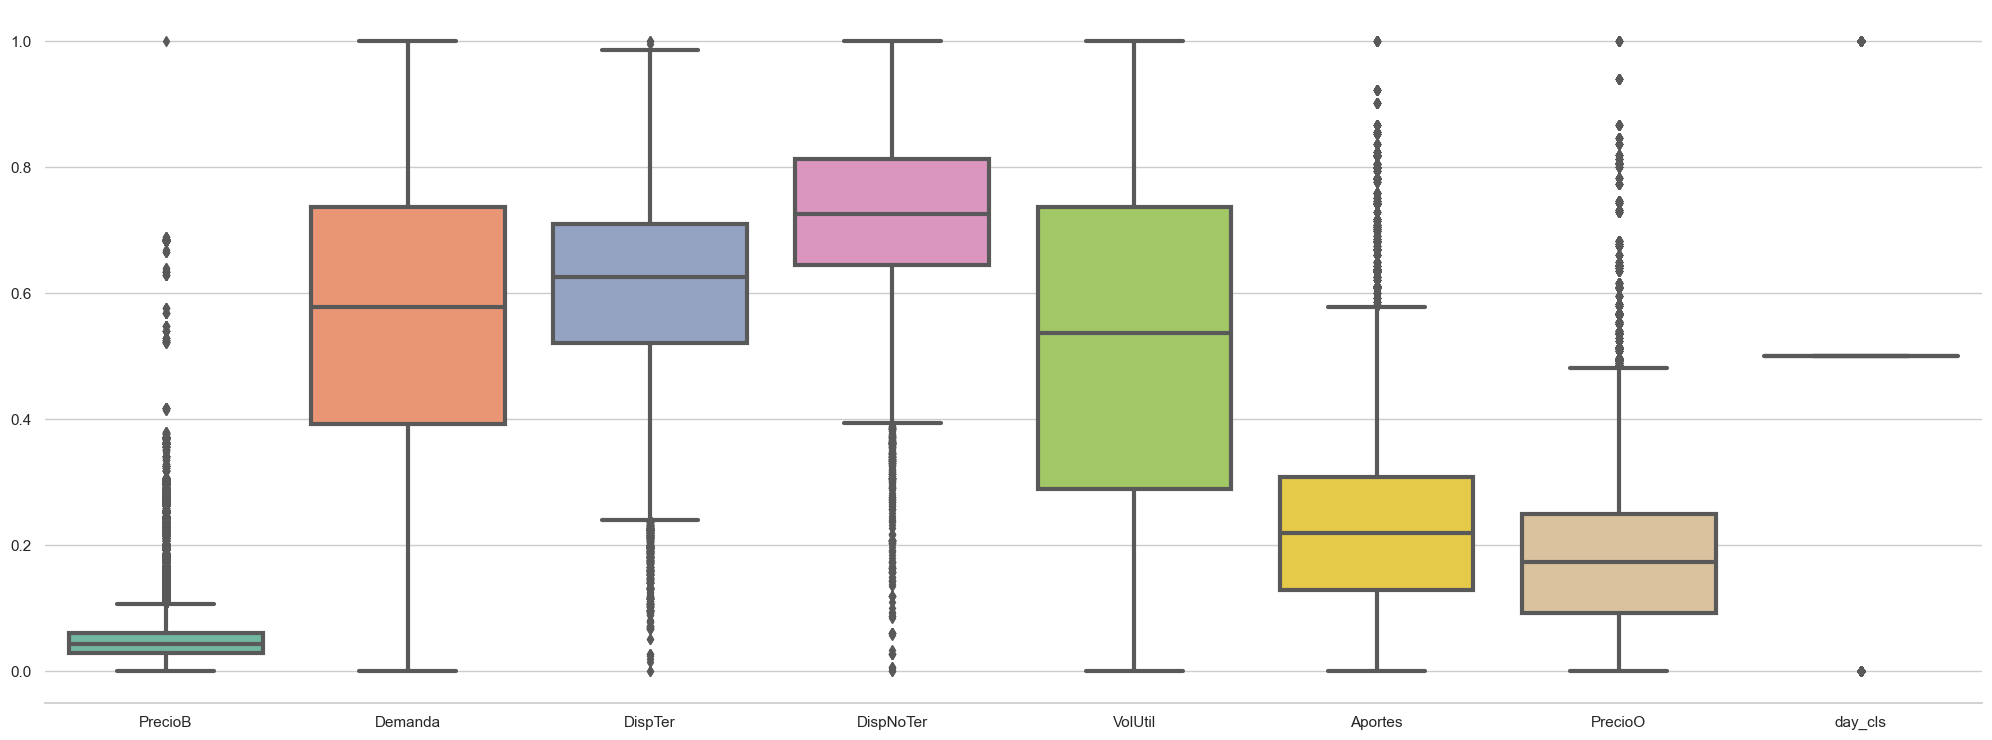

In [15]:
#Se realiza un diagrama de cajas a los datos normalizados
sns.set(rc={'figure.figsize':(25,9)}) 
sns.set(style="whitegrid") 
sns.boxplot(data = Datos_Min_Max, linewidth = 3, palette="Set2", fliersize = 5)
sns.despine(left=True)

#### Gráfica de correlaciones

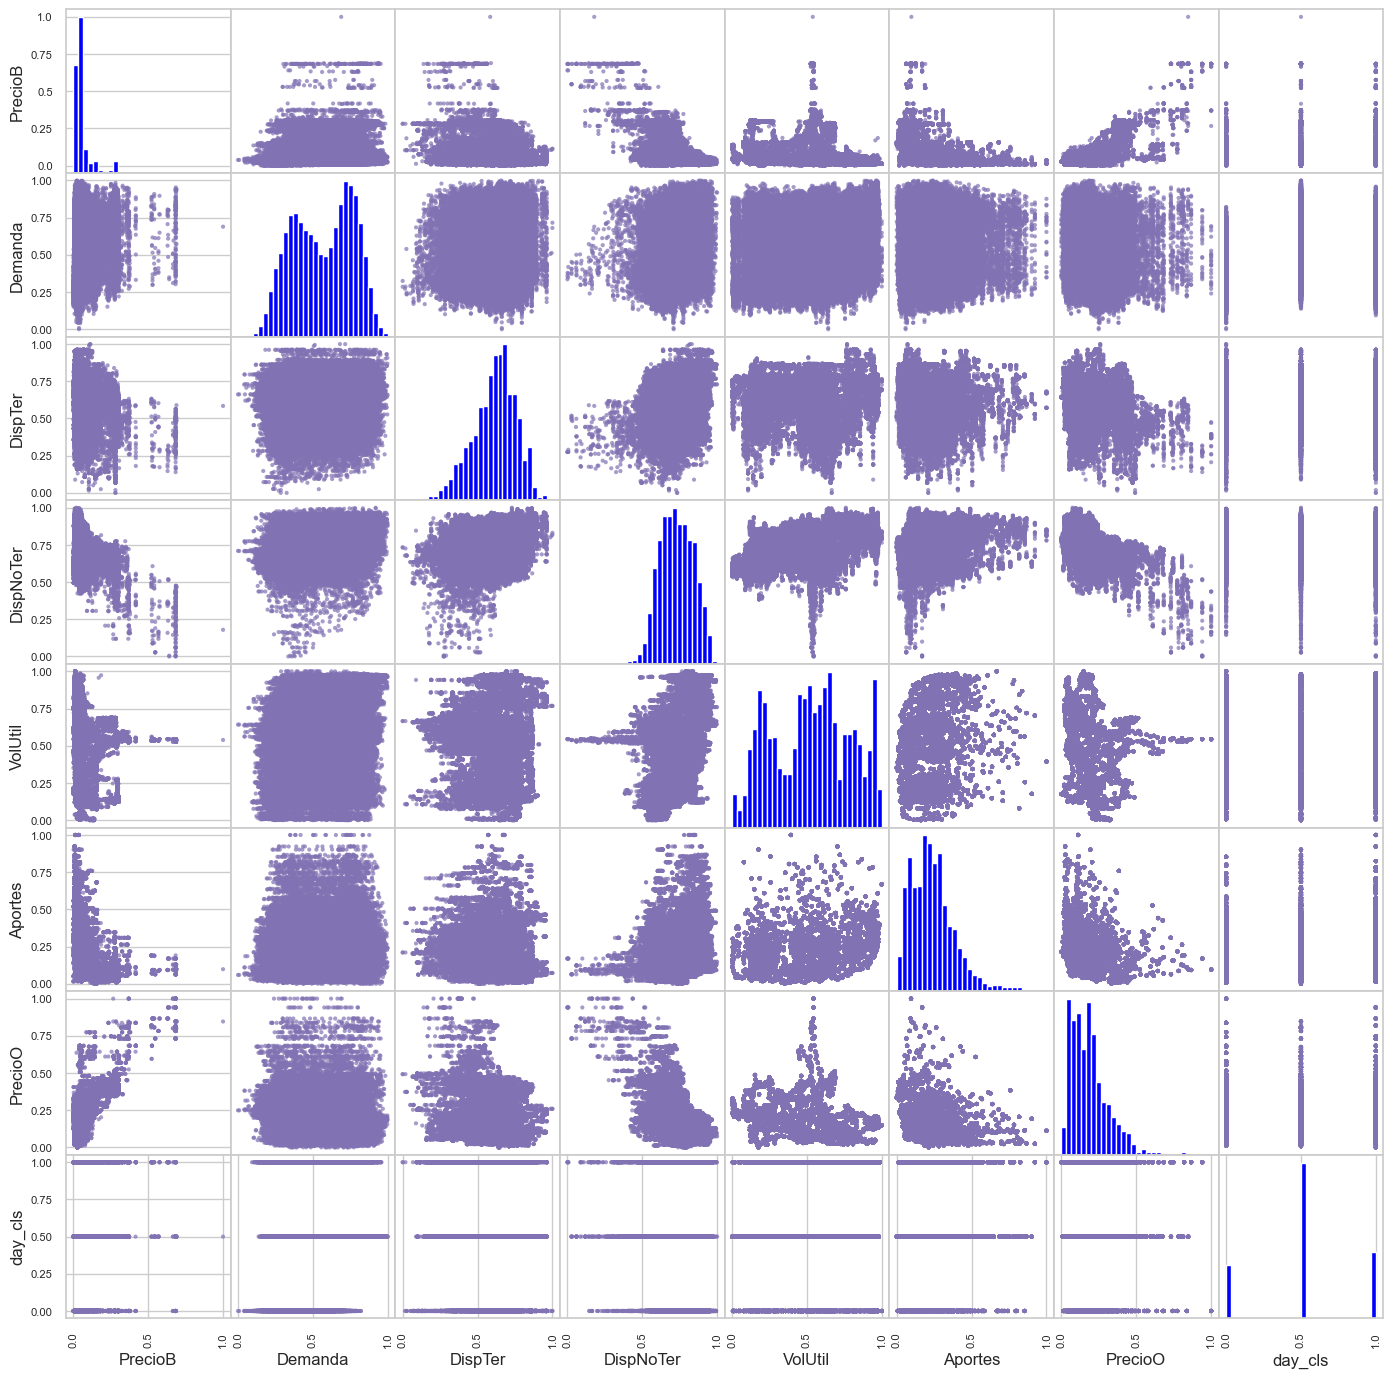

In [16]:
#Se realiza una gráfica para observar la correlación de los datos
pd.plotting.scatter_matrix(Datos_Min_Max, alpha=0.7, figsize=(17,17), range_padding = 0.1, diagonal='hist',
                           color = 'm', hist_kwds = {'bins':30, 'color':'blue'}) # Grafica de dispersión e histograma
plt.show()

#### Gráfica para observar la correlación numérica de las varaibles

,PrecioB,Demanda,DispTer,DispNoTer,VolUtil,Aportes,PrecioO,day_cls
PrecioB,1.000000,0.114226,-0.276507,-0.504881,-0.229021,-0.328373,0.729704,0.022476
Demanda,0.114226,1.000000,0.045098,0.165874,0.121433,0.028270,-0.074154,0.213327
DispTer,-0.276507,0.045098,1.000000,0.277408,0.017735,-0.083619,-0.212933,-0.014033
DispNoTer,-0.504881,0.165874,0.277408,1.000000,0.458968,0.310174,-0.579709,-0.004955
VolUtil,-0.229021,0.121433,0.017735,0.458968,1.000000,0.199992,-0.245625,0.019787


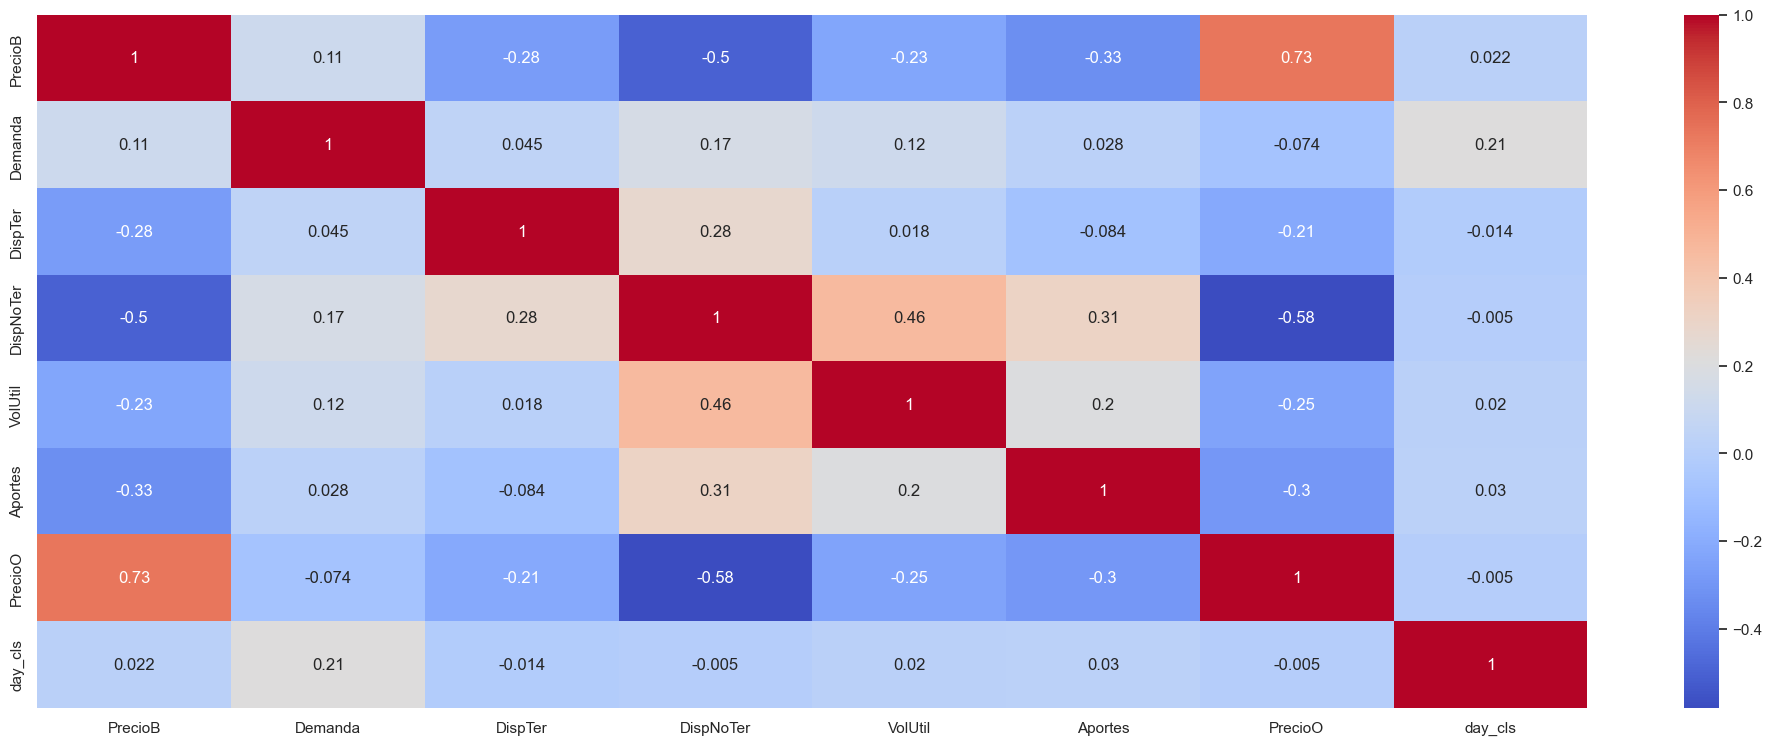

In [18]:
matriz_corr=df_DataAnalisis.corr()
sns.heatmap(df_DataAnalisis.corr(), annot=True, cmap='coolwarm')
matriz_corr.head()

#### Importancia de las características

In [51]:
import numpy as np
X=Datos_Min_Max[name_column[1:]]

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PrecioB    52584 non-null  float64
 1   Demanda    52584 non-null  float64
 2   DispTer    52584 non-null  float64
 3   DispNoTer  52584 non-null  float64
 4   VolUtil    52584 non-null  float64
 5   Aportes    52584 non-null  float64
 6   PrecioO    52584 non-null  float64
 7   day_cls    52584 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB


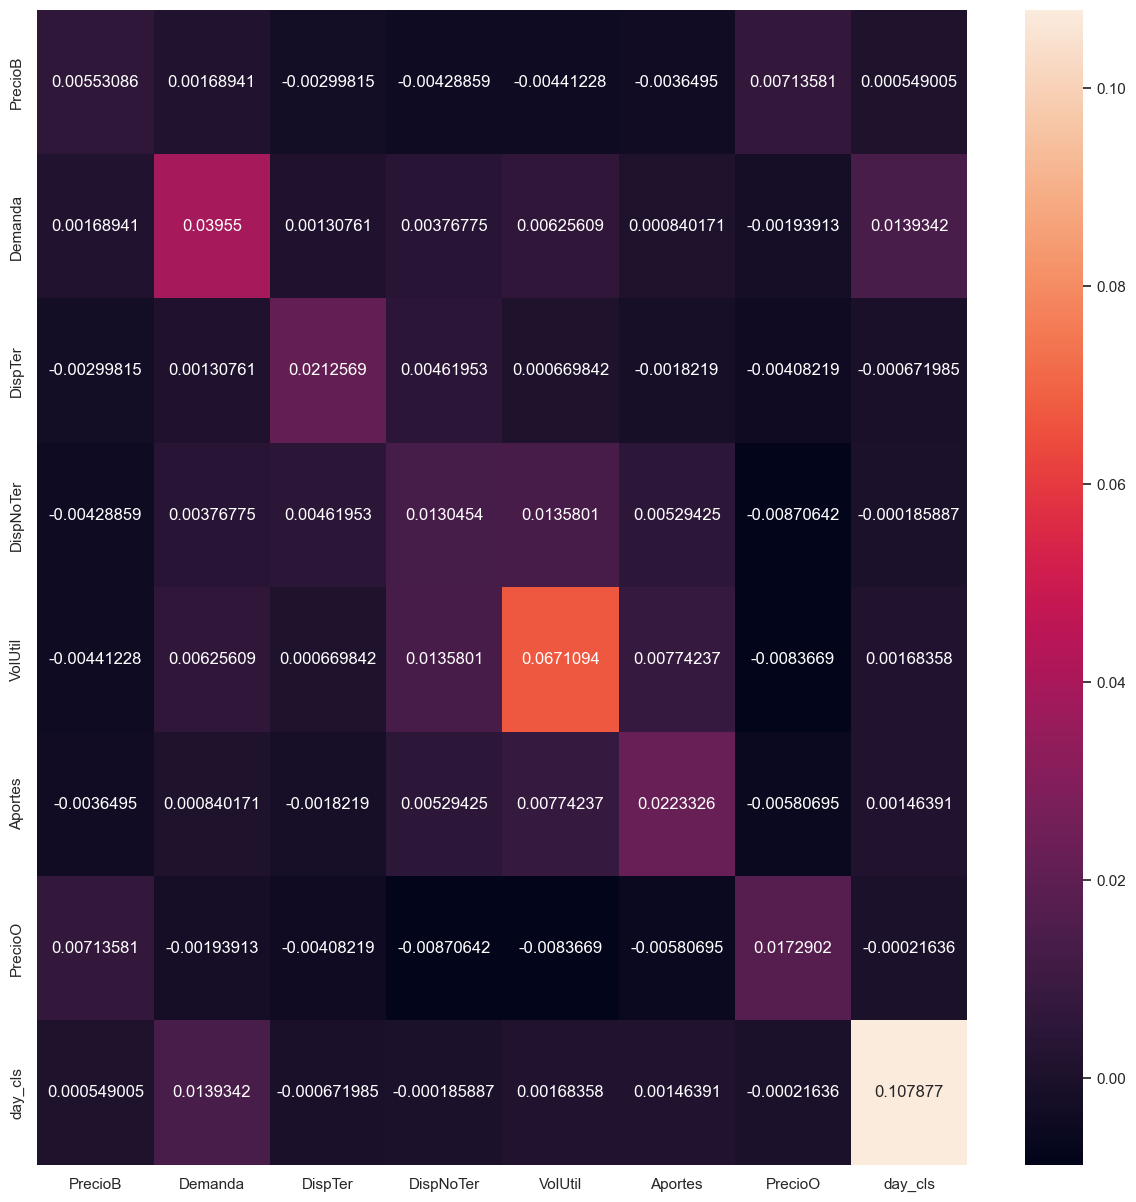

In [53]:
Matrix_Covarianza = np.cov(X.transpose(), bias=True) # bias = True normaliza los datos (les recomienda esa opción)
Caracteristicas = X.columns

plt.figure(figsize=(15,15))
ax = sns.heatmap(Matrix_Covarianza, annot=True, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas)
plt.show()

In [54]:
eigen_values, eigen_vectors = np.linalg.eig(Matrix_Covarianza)

In [55]:
eigen_values

array([0.11090577, 0.07585179, 0.00188376, 0.00539155, 0.01219305,
       0.03613518, 0.02867959, 0.02295186])

In [56]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100)
print(variance_explained)

[37.72400741560154, 25.800581723169408, 0.6407509080704322, 1.833907607656116, 4.147399308897383, 12.291190392410927, 9.755210792577522, 7.806951851616669]


In [35]:
from statsmodels.graphics.tsaplots import plot_pacf

df_Data_pafc=df_Data.copy()
df_Data_pafc.set_index('Date',inplace=True)
names_col=df_Data_pafc.columns


c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


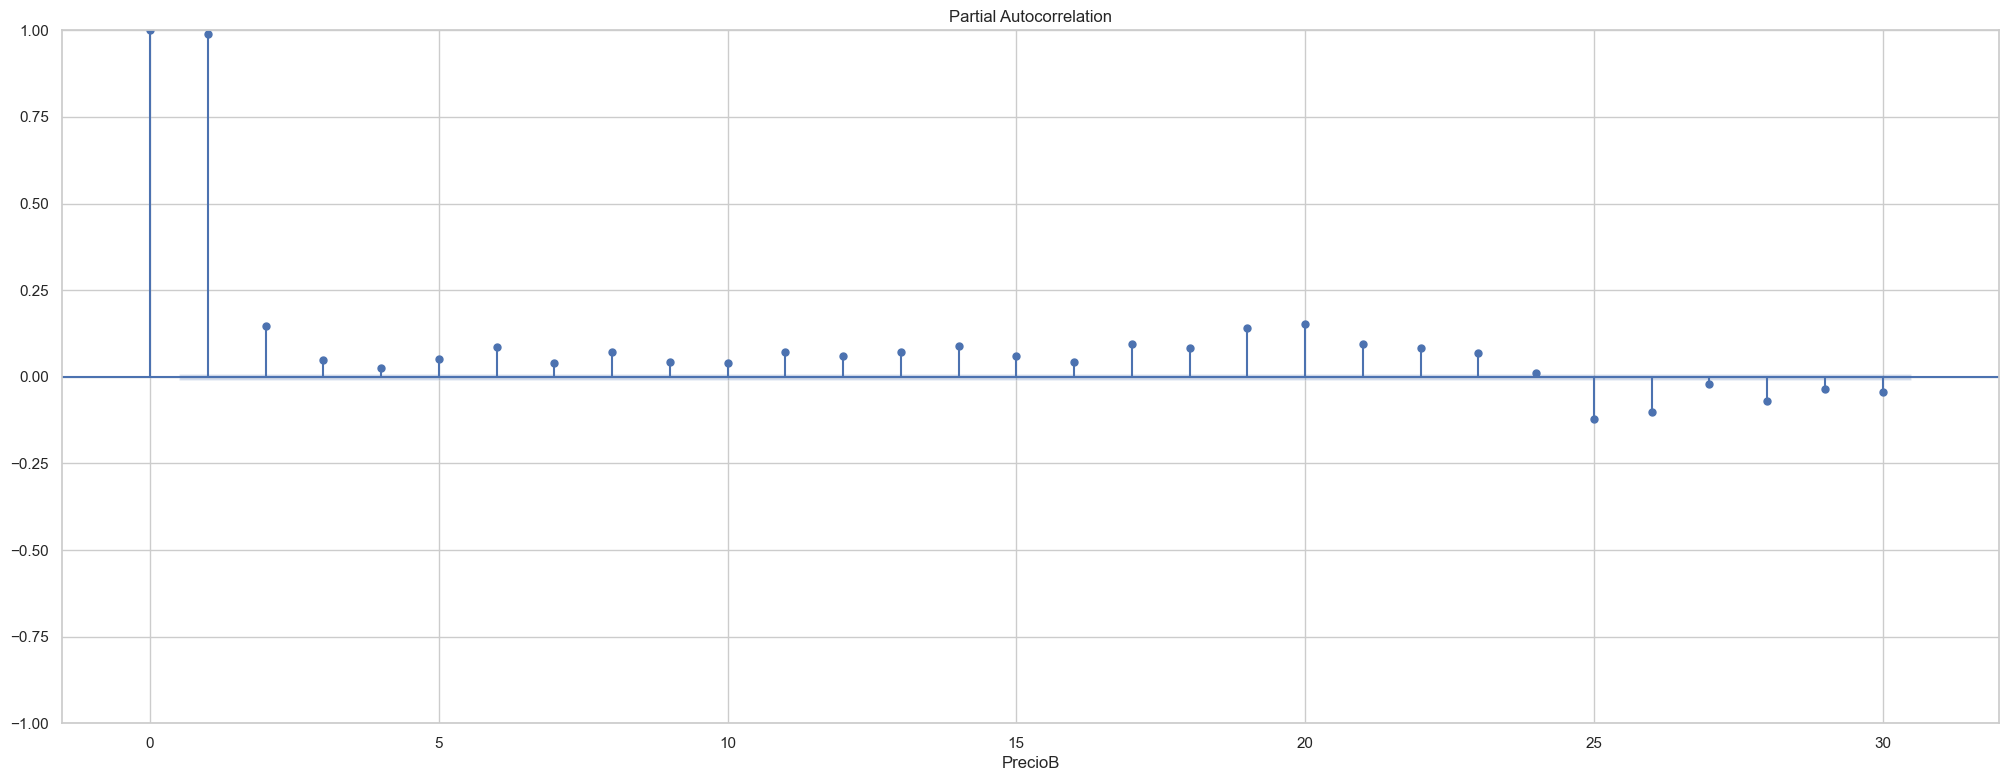

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


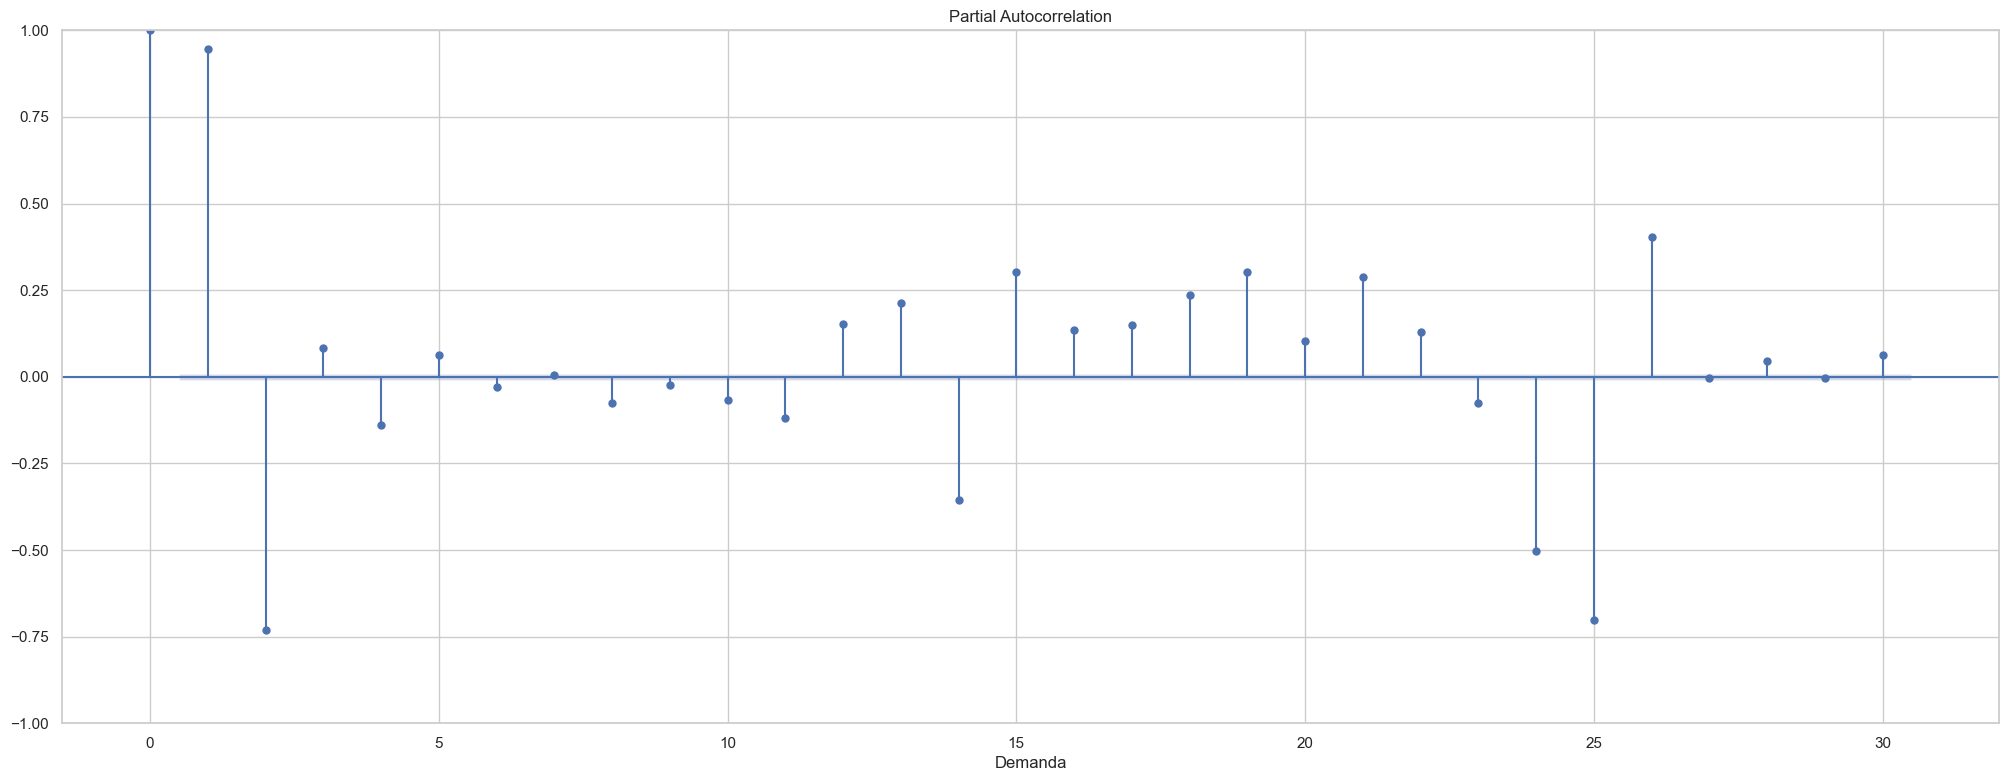

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


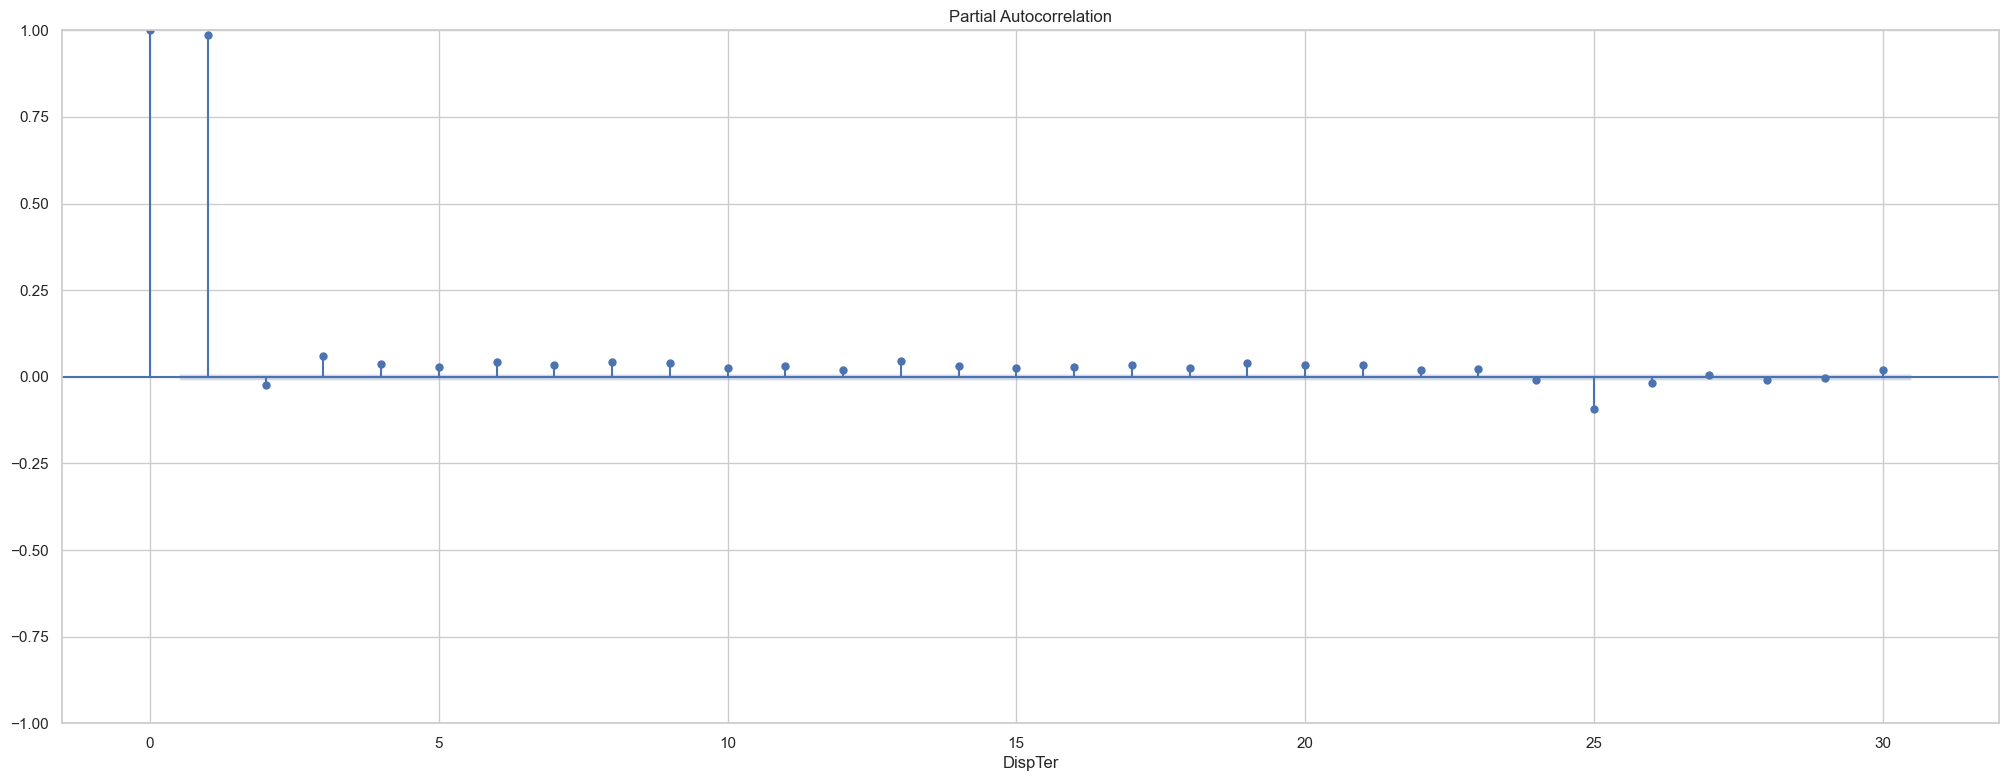

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


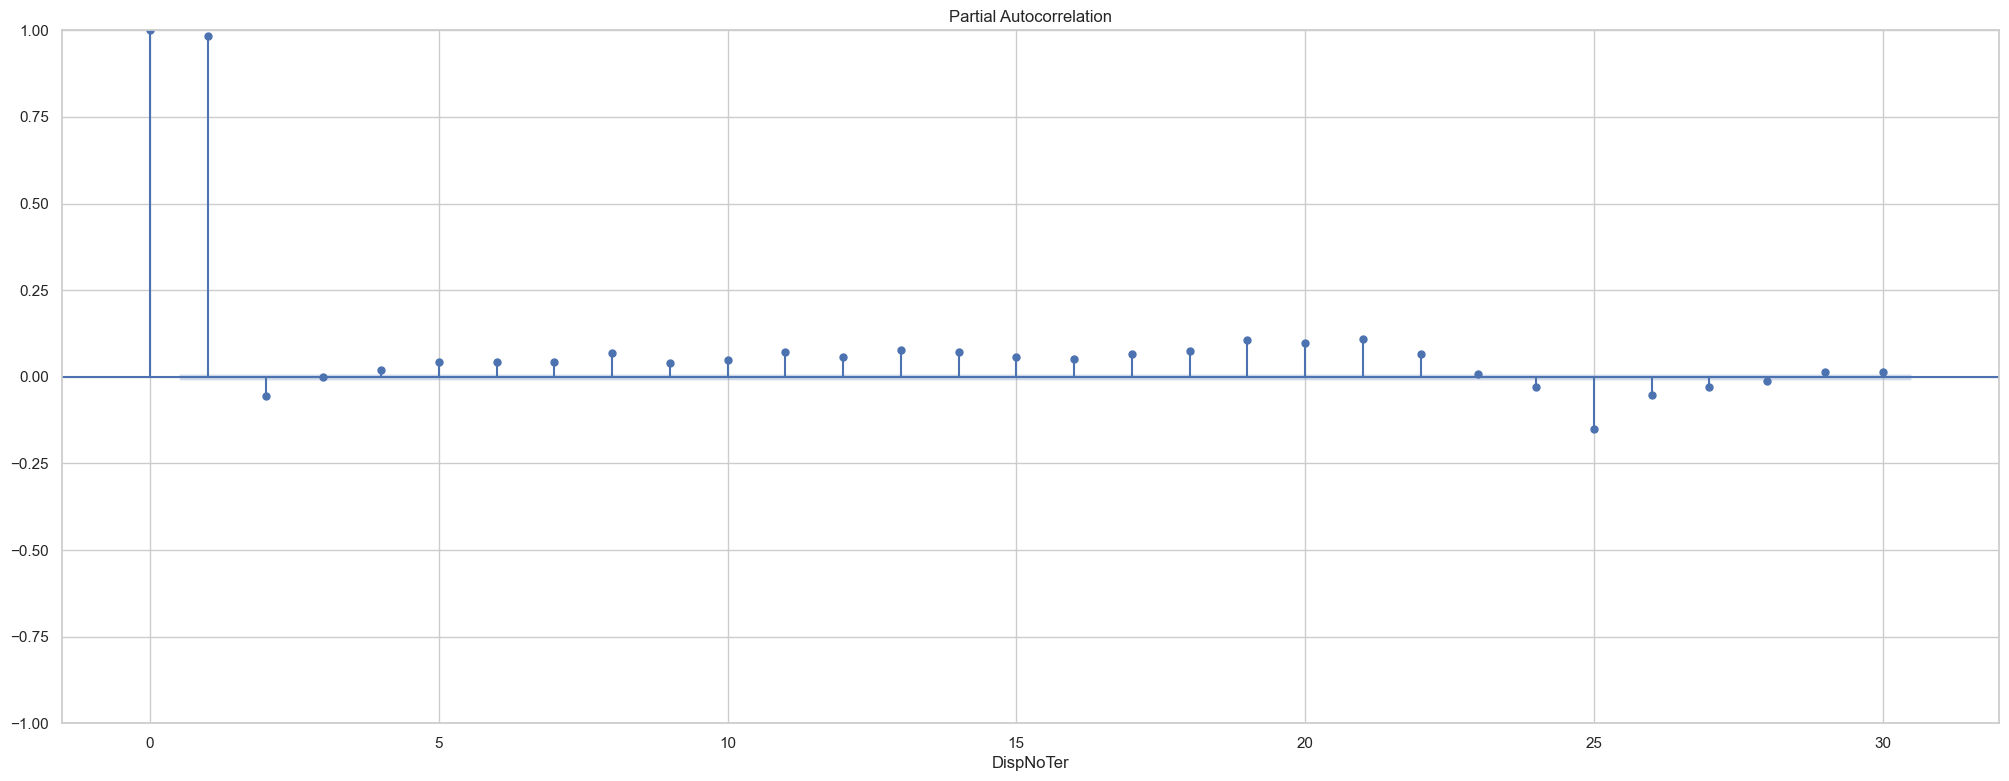

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


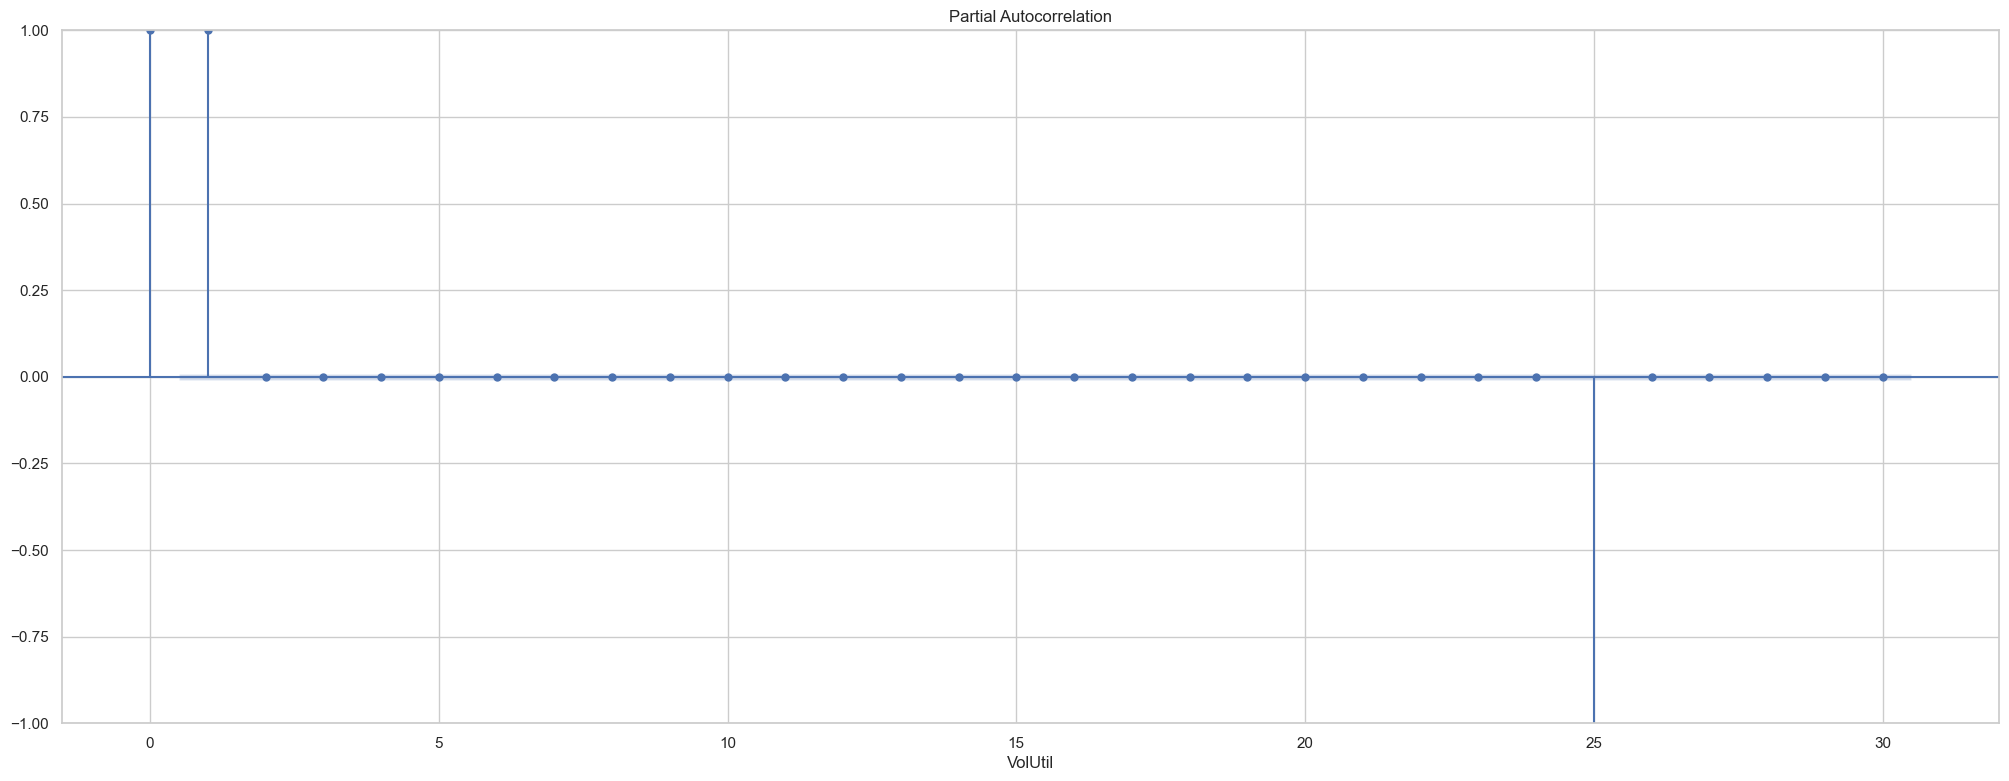

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


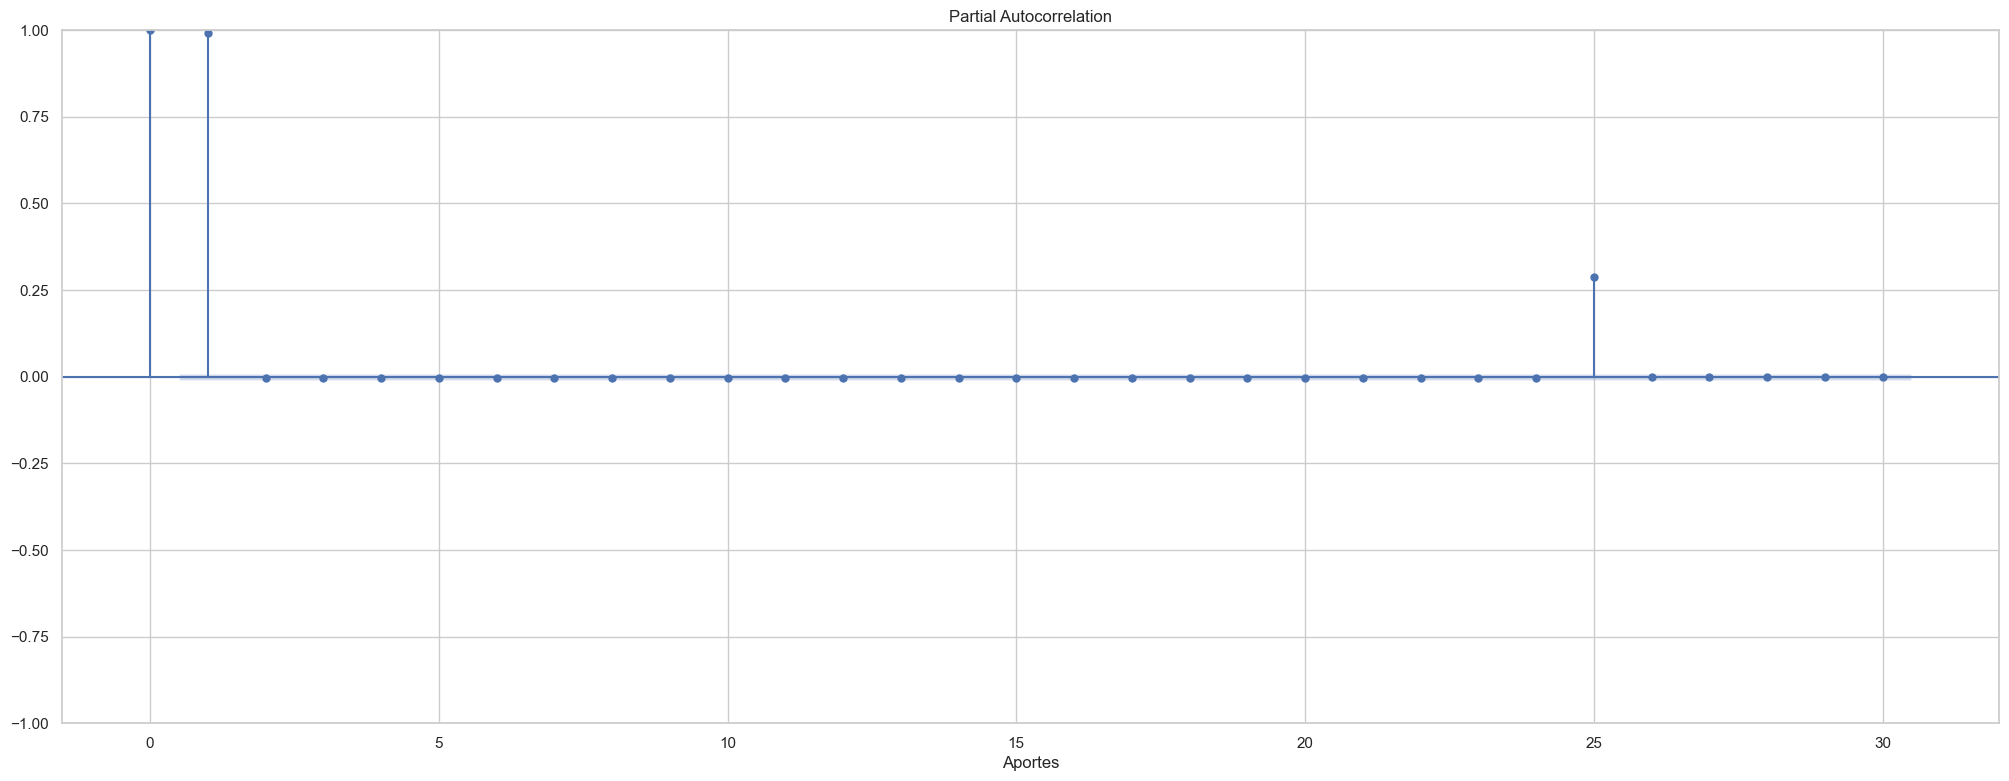

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


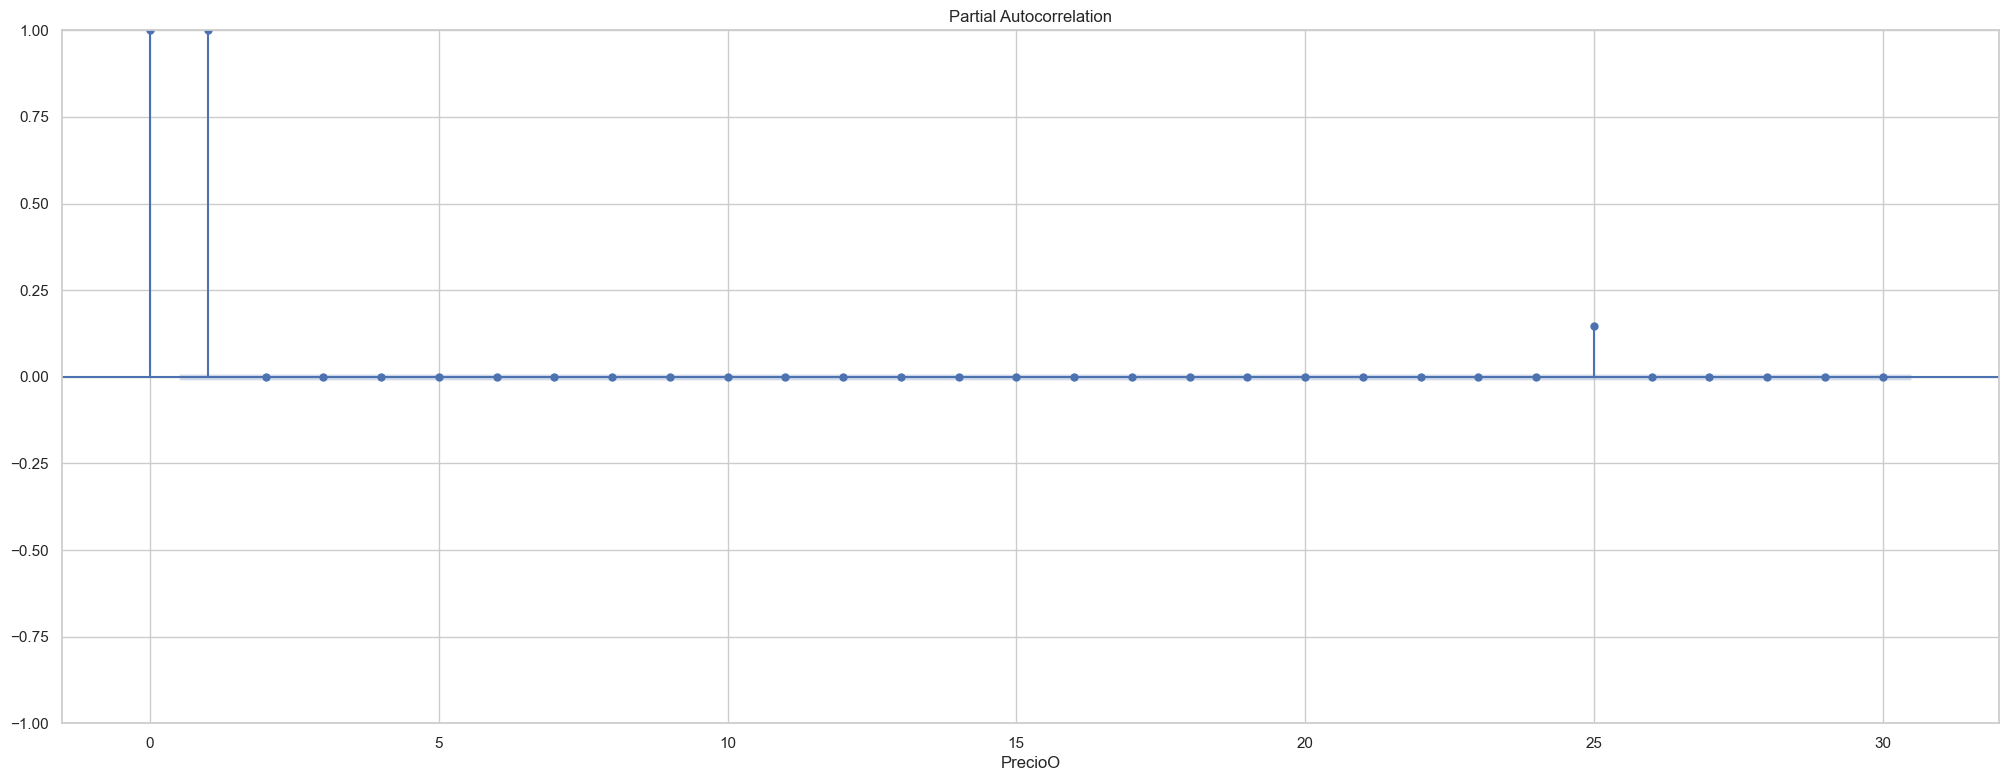

c:\Users\alejo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


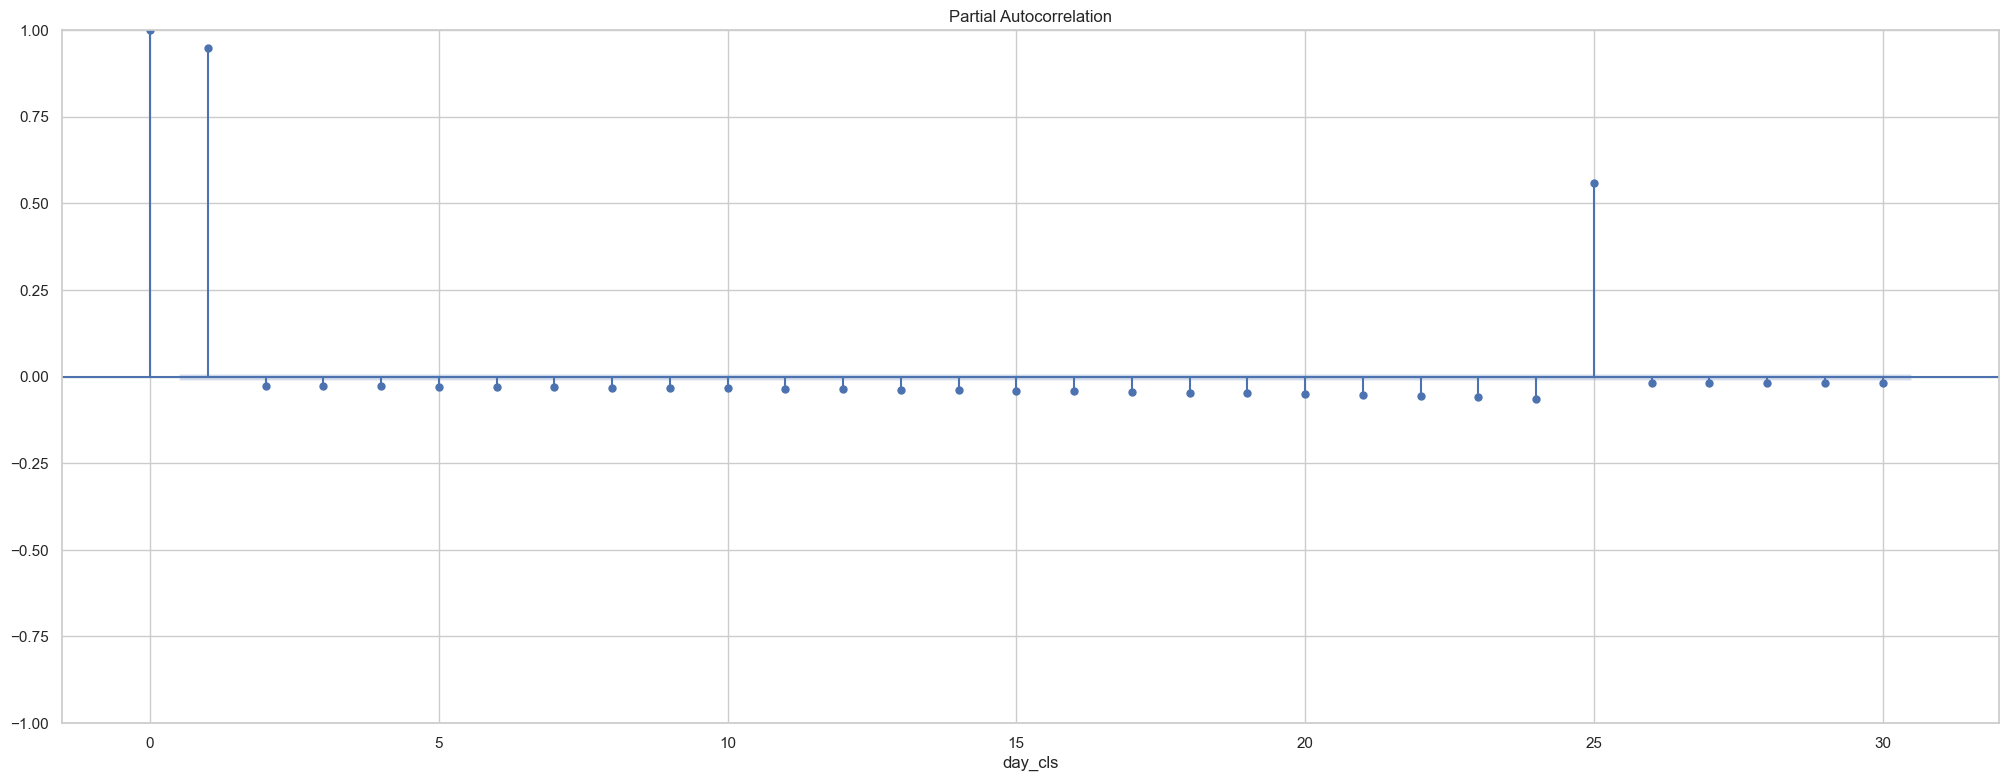

In [44]:
xlabels=['Precio de Bolsa', 'Demanda', 'Disponibilidad Térmica','Disponibilidad No Térmica', \
'Volumen Útil','Aportes','Precio de Oferta','Tipo de día']
i=0
for names in names_col:
    datapafc=df_Data_pafc[[names]]
    plot_pacf(datapafc, lags=30)
    plt.xlabel(xlabels[i])
    plt.show()
    i+=1
    file=os.path.join(s_prt_path,'graficos\\' + 'pacf' + str(names) + '.jpg')
    plt.savefig(file, format="jpg", bbox_inches="tight")